In [5]:
import pm4py
import pandas as pd

log = pm4py.read_xes('Sepsis Cases - Event Log.xes')
dataframe = pm4py.convert_to_dataframe(log)
dataframe.to_csv('Sepsis Cases - Event Log.csv')

parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1381.27it/s]


In [41]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Sepsis Cases - Event Log.csv')

# Group by 'case_id' and concatenate the events for each trace
trace_df = df.groupby('case:concept:name')['org:group'].apply(lambda x: ','.join(x)).reset_index()

# Count the occurrences of each unique trace
trace_counts = trace_df['org:group'].value_counts()

# Rename the column for display purposes
trace_counts = trace_counts.rename_axis('Trace').reset_index(name='Count')

# Print the results without the index
print(trace_counts.to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                            Trace  Count
                                                                                                                                                                                                                                                                                                                                                                        A,C,A,B,B     46
                                                                                                                                                                                                                                                      

In [14]:
df

,Unnamed: 0,InfectionSuspected,org:group,DiagnosticBlood,DisfuncOrg,SIRSCritTachypnea,Hypotensie,SIRSCritHeartRate,Infusion,DiagnosticArtAstrup,...,DiagnosticLacticAcid,lifecycle:transition,Diagnose,Hypoxie,DiagnosticUrinarySediment,DiagnosticECG,case:concept:name,Leucocytes,CRP,LacticAcid
0,0,True,A,True,True,True,True,True,True,True,...,True,complete,A,False,True,True,A,NaN,NaN,NaN
1,1,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,A,9.6,NaN,NaN
2,2,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,21.0,NaN
3,3,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,2.2
4,4,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,A,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15209,15209,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,KNA,NaN,66.0,NaN
15210,15210,NaN,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,KNA,NaN,NaN,NaN
15211,15211,False,L,False,False,False,False,False,False,False,...,False,complete,NaN,False,False,False,LNA,NaN,NaN,NaN
15212,15212,NaN,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,complete,NaN,NaN,NaN,NaN,LNA,NaN,NaN,NaN


In [59]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Sepsis Cases - Event Log.csv')

# Group by 'Case ID' and concatenate the events for each trace
trace_df = df.groupby('case:concept:name')['org:group'].apply(lambda x: ','.join(x)).reset_index()

# Count the occurrences of each unique trace
trace_counts = trace_df['org:group'].value_counts()

# Rename the column for display purposes
trace_counts = trace_counts.rename_axis('Trace').reset_index(name='Count')


# Print the results without the index, ensuring left-to-right display
print(trace_counts.to_string(index=False))

                                                                                                                                                                                                                                                                                                                                                                            Trace  Count
                                                                                                                                                                                                                                                                                                                                                                        A,C,A,B,B     46
                                                                                                                                                                                                                                                      

In [47]:
# Drop rows from line 36 to the end
df = df.iloc[:534]
# Group by 'case_id' and concatenate the events for each trace
trace_df = df.groupby('case:concept:name')['org:group'].apply(lambda x: ','.join(x)).reset_index()

# Count the occurrences of each unique trace
trace_counts = trace_df['org:group'].value_counts()

# Rename the column for display purposes
trace_counts = trace_counts.rename_axis('Trace').reset_index(name='Count')

# Print the results without the index
print(trace_counts.to_string(index=False))


                                      Trace  Count
                            A,C,A,A,B,B,B,A      2
                                      A,C,A      2
A,B,B,B,C,A,A,A,D,B,B,B,B,B,B,B,B,B,B,B,B,E      1
                      A,C,A,A,B,B,B,A,I,E,?      1
                            A,C,A,B,B,B,A,A      1
                        A,C,A,B,B,B,J,J,R,E      1
                  A,C,B,B,B,A,B,B,B,M,B,E,?      1
                      A,C,A,A,B,B,B,A,Q,B,E      1
  A,C,A,A,B,B,B,A,P,B,B,B,B,B,B,B,O,B,B,E,?      1
                      A,C,A,B,H,B,B,B,B,B,E      1
                        A,C,A,A,A,B,B,B,Q,E      1
      A,C,A,B,B,B,A,A,G,P,B,B,B,F,B,B,B,E,?      1
                                  A,C,A,B,B      1
                                      L,C,L      1
                    A,C,A,B,B,B,O,A,A,B,B,E      1
                    A,C,B,B,B,A,A,A,F,B,B,E      1
              A,C,A,B,B,B,A,A,N,B,B,B,B,E,?      1
            A,C,A,B,B,B,A,H,B,B,H,A,B,B,E,?      1
                      A,C,A,B,B

parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1281.69it/s]


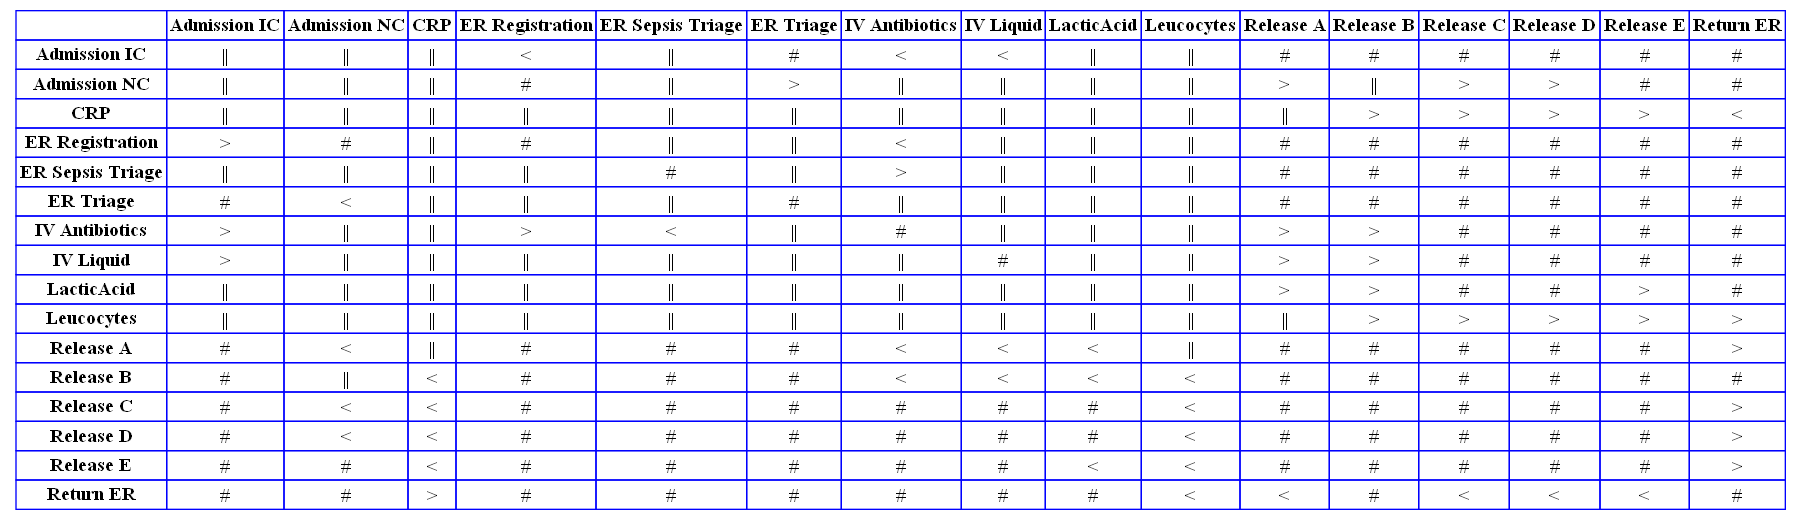

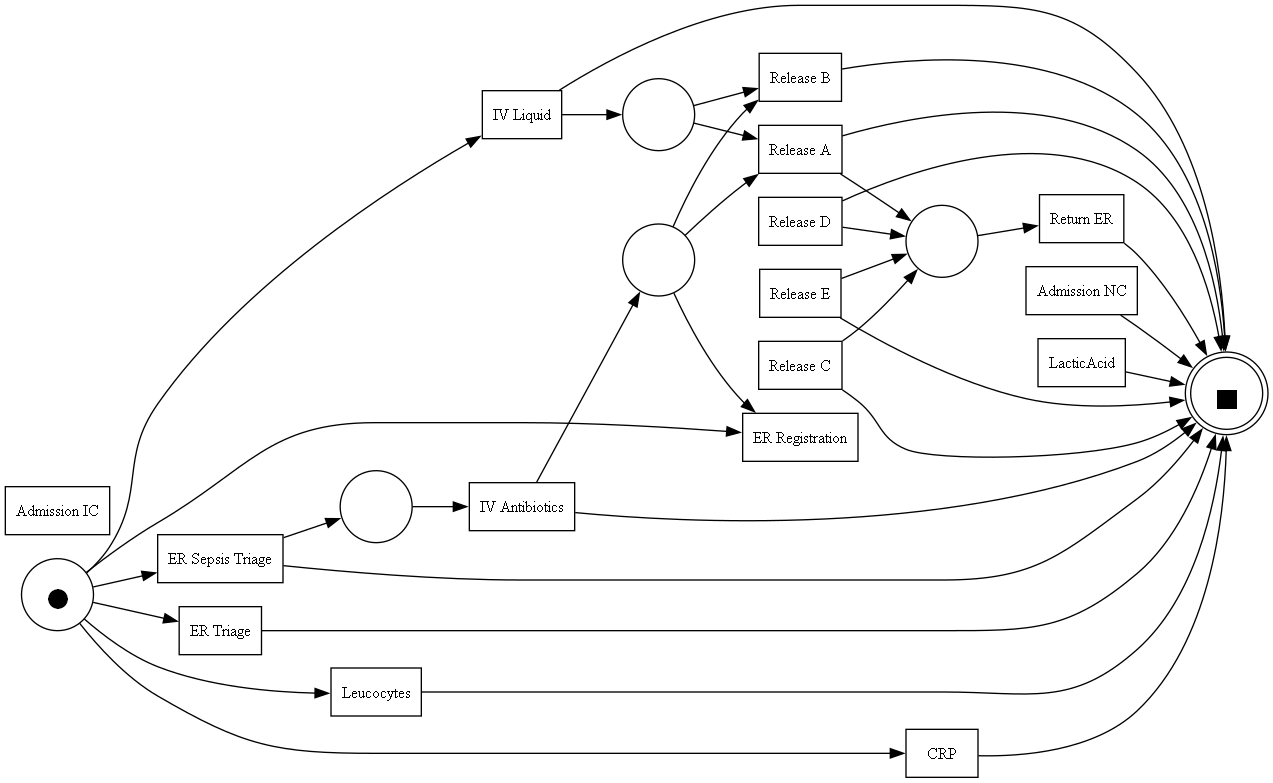

In [30]:
log_1 = pm4py.read_xes('Sepsis Cases - Event Log.xes')
footprints = pm4py.discover_footprints(log_1)
pm4py.view_footprints(footprints)
net, im, fm = pm4py.discover_petri_net_alpha(log_1)
pm4py.view_petri_net(net, im, fm)

parsing log, completed traces :: 100%|██████████| 1050/1050 [00:00<00:00, 1290.62it/s]


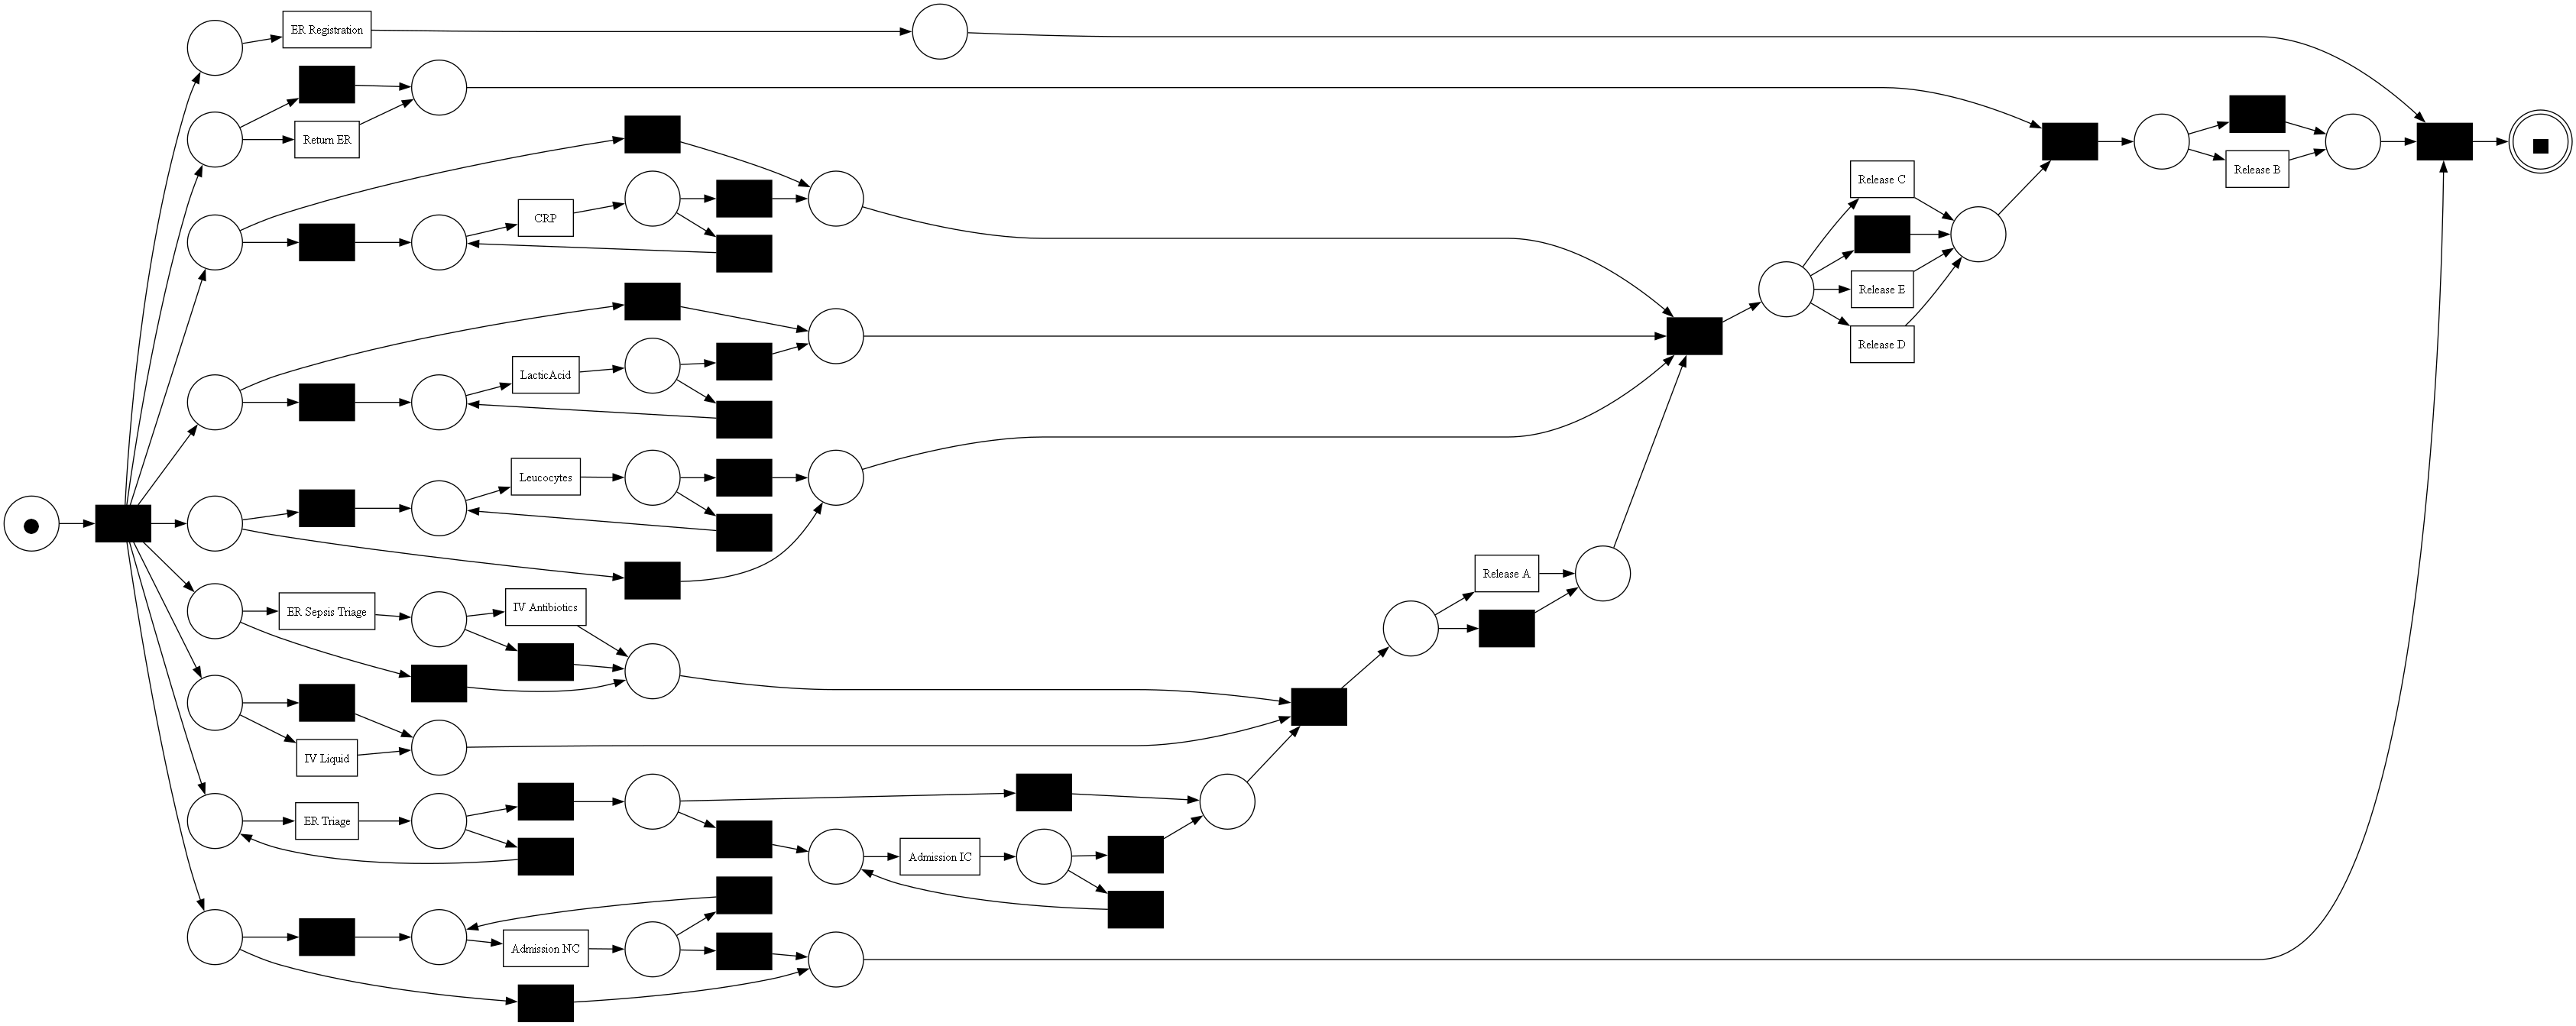

In [60]:
log_1 = pm4py.read_xes('Sepsis Cases - Event Log.xes')
net, im, fm = pm4py.discover_petri_net_inductive(log_1)
pm4py.view_petri_net(net, im, fm)